# Predicting High-Usage Players on the Minecraft Server


In [22]:
library(tidyverse)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1. Data Description

In [23]:
summary(players)
summary(sessions)
head(players, 5)
head(sessions, 5)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12


In [24]:
# Count how many unique players appear in sessions.csv
n_sessions_players <- sessions |> distinct(hashedEmail) |> nrow()

# Count total players in players.csv
n_total_players <- nrow(players)

# Print both results
n_sessions_players
n_total_players

[1] 125

[1] 196

The project uses two datasets collected from the UBC Minecraft research server:  
**`players.csv`** and **`sessions.csv`**.

#### players.csv
- **Observations:** 196 unique players  
- **Variables:** 7  
- **Description of variables:**

| Variable | Type | Description | Example | Issues / Notes |
|-----------|------|--------------|----------|----------------|
| `experience` | Categorical (character) | Player’s self-reported Minecraft experience level | "Veteran", "Pro", "Amateur" | Uneven group sizes possible |
| `subscribe` | Logical (TRUE/FALSE) | Whether the player subscribed to the research newsletter | TRUE | Could serve as a target variable for Question 1 |
| `hashedEmail` | Character | Unique player identifier (used to link to sessions.csv) | long hash string | Acts as join key |
| `played_hours` | Numeric | Total reported playtime (hours) | Mean = 5.85, Max = 223.1 | Strong right skew — some players play far more than others |
| `name` | Character | Player’s name | “Morgan” | Not useful for prediction |
| `gender` | Categorical | Player’s gender | “Male”, “Female” | May contain small or unbalanced categories |
| `Age` | Numeric | Player’s age (years) | Mean = 21.14, Range = 9–58 | 2 missing values |

---
#### sessions.csv
- **Observations:** 1,535 individual play sessions  
- **Variables:** 5  
- **Description of variables:**

| Variable | Type | Description | Example | Issues / Notes |
|-----------|------|--------------|----------|----------------|
| `hashedEmail` | Character | Player identifier linking to players.csv | same hash as above | Used for join |
| `start_time` | Character (datetime) | Start time of session (`dd/mm/yyyy hh:mm`) | 30/06/2024 18:12 | Needs parsing to datetime |
| `end_time` | Character (datetime) | End time of session (`dd/mm/yyyy hh:mm`) | 30/06/2024 18:24 | Needs parsing to datetime |
| `original_start_time` | Numeric (timestamp) | Unix-like start time (ms) | 1.719e+12 | Duplicate info, potential conversion issue |
| `original_end_time` | Numeric (timestamp) | Unix-like end time (ms) | 1.719e+12 | Often equal to start, possible recording bug |

---

#### Potential Issues
- 71 players have no sessions (appear only in players.csv).  
- `played_hours` and session duration both measure playtime which may overlap.  
- The time format (`dd/mm/yyyy`) must be converted for time calculations.  
- `original_*` timestamps seem identical, might be just recording the date.  
- Possible data imbalance: more players with low playtime than high playtime.  
- Sampling bias may exist; data collected from voluntary participants.

---

#### Summary Statistics (rounded to 2 decimals)
- Mean player age: **21.14 years**
- Mean reported playtime: **5.85 hours**
- Median playtime: **0.10 hours**
- Max playtime: **223.10 hours**

These statistics suggest that most players spend little time on the server, but a few players contribute a lot more data which may bias predictions to those of high-usage players.


## 2. Questions

**Broad question:**  
Which types of players are most likely to contribute a large amount of gameplay data on the Minecraft research server?

**Specific question:**  
Can early player characteristics recorded in `players.csv` — such as age, gender, and self-reported experience level — be used to predict whether a player will become an active participant (someone who logs at least one session) and, among active players, which ones will become high-usage players (top 25% by total playtime)?

**Rationale:**  
The dataset reveals that only 125 of the 196 registered players actually played, meaning about 36 % of players were inactive.  
Understanding the characteristics of players who become active or highly engaged is valuable for recruitment and resource planning.  
If certain features (for example, older age or higher experience level) are associated with heavier usage, the research team could target those groups to ensure sufficient data collection and efficient allocation of server resources.

**How the data will help answer this:**  
- `players.csv` provides demographic and self-reported information about each player.  
- `sessions.csv` records detailed play sessions, allowing calculation of total session time per player.  
- By joining the two datasets on `hashedEmail`, I can label each player as active (≥ 1 session) or inactive (0 sessions), and compute total playtime for active players.  
- This tidy, player-level dataset can then be used in a predictive model to determine which player characteristics best explain or predict activity level.

## 3. Exploratory Data Analysis & Visualization

In this section, I load and minimally wrangle the data to explore its structure and key patterns.
The goal is to understand how player characteristics and play behavior vary across the dataset before applying any predictive models.
I focus on summarizing quantitative variables in players.csv and visualizing player engagement patterns. R Code: Load & Tidy Data


In [25]:
# Parse session times (convert from text to datetime)
sessions <- sessions |>
  mutate(start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")))

# Summarize total session time and number of sessions per player
player_sessions <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_minutes = sum(duration_minutes, na.rm = TRUE), num_sessions = n())

# Merge with player info
player_summary <- players |>
  left_join(player_sessions, by = "hashedEmail") |>
  mutate(num_sessions = replace_na(num_sessions, 0),
    total_minutes = replace_na(total_minutes, 0),
    active = if_else(num_sessions > 0, "Active", "Inactive"))



In [26]:
players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~round(mean(.x, na.rm = TRUE), 2)))


played_hours,Age
<dbl>,<dbl>
5.85,21.14


#### Summary Statistics for Quantitative Variables
The mean player age is approximately 21.14 years, while the average self-reported total playtime is 5.85 hours.
This suggests that the player base is relatively young, with large variation in playtime (some players report hundreds of hours, while others report none).


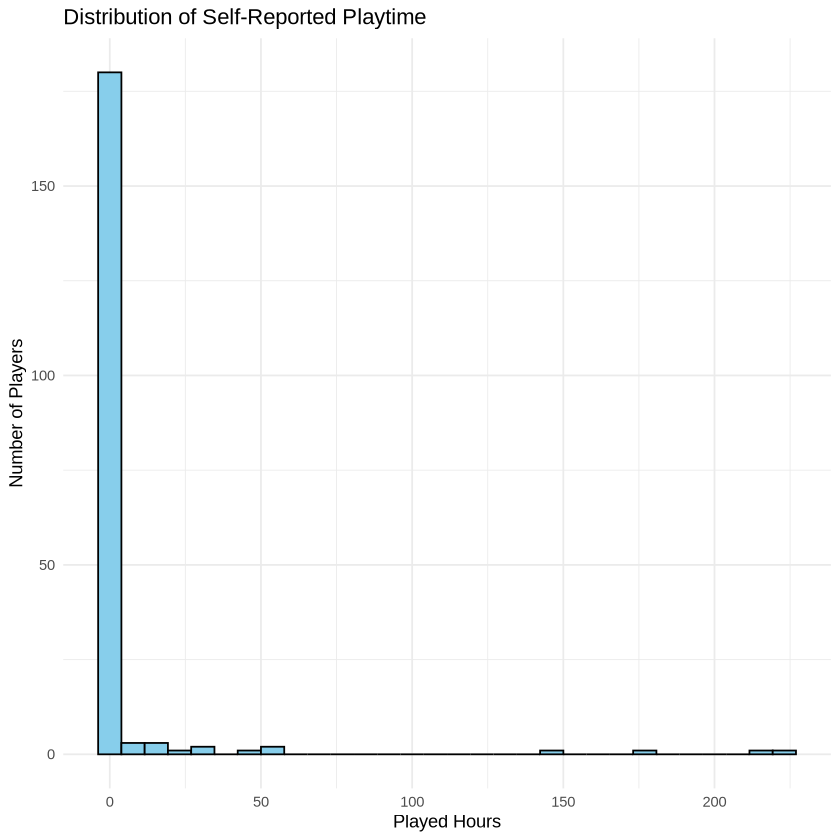

In [27]:
players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Self-Reported Playtime", x = "Played Hours", y = "Number of Players") +
  theme_minimal()


The distribution of reported playtime is heavily right-skewed, with most players reporting very little playtime and a few players reporting extremely high values.
This indicates that play activity is concentrated among a small group of highly active players.


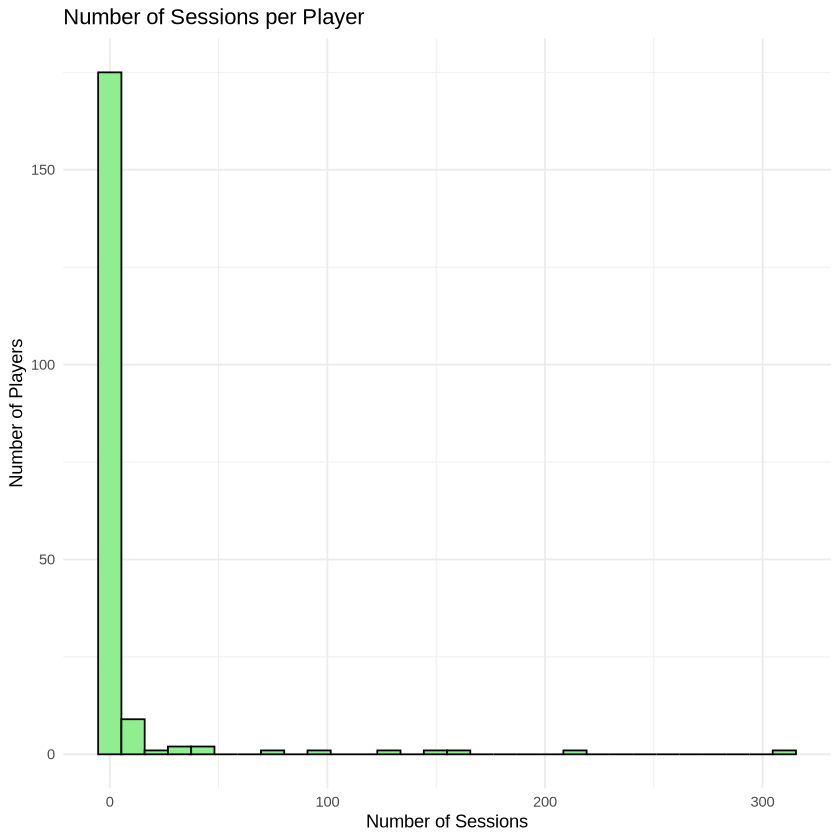

In [28]:
player_summary |>
  ggplot(aes(x = num_sessions)) +
  geom_histogram(bins = 30, fill = "lightgreen", color = "black") +
  labs(title = "Number of Sessions per Player", x = "Number of Sessions", y = "Number of Players") +
  theme_minimal()


Most players participated in fewer than five sessions, while a small number of players had many sessions.
This supports the earlier finding that only a subset of players are consistently active on the server.


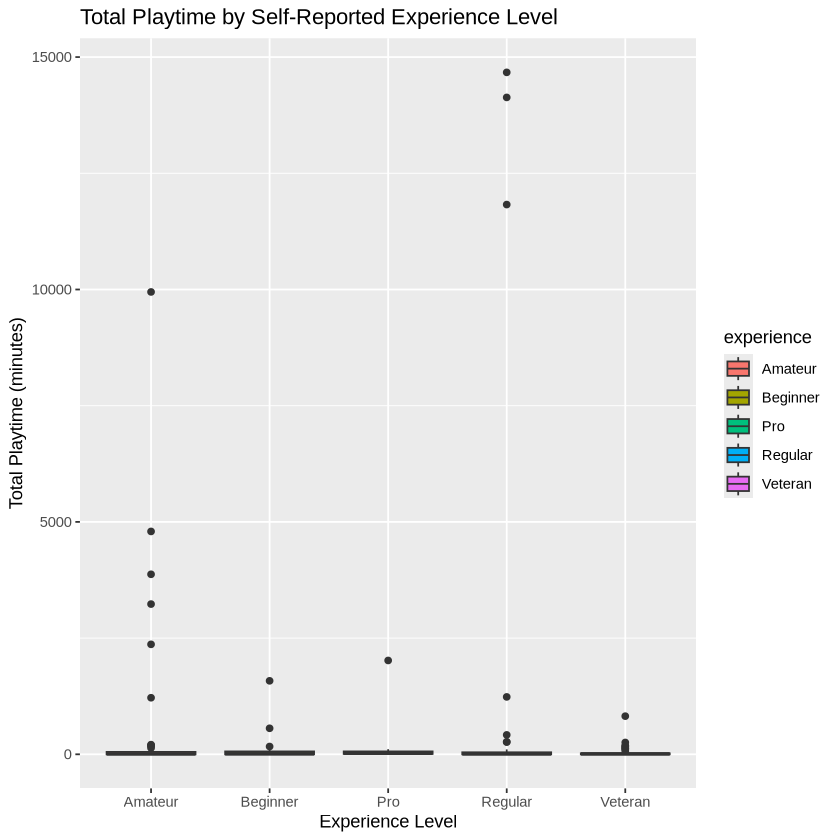

In [30]:
player_summary |>
  ggplot(aes(x = experience, y = total_minutes, fill = experience)) +
  geom_boxplot() +
  labs(title = "Total Playtime by Self-Reported Experience Level",
    x = "Experience Level",
    y = "Total Playtime (minutes)")


Players who identify as “Pro” or “Veteran” tend to have longer total playtime than less experienced players, 
suggesting that self-reported experience may be an important predictor of engagement.


#### Summary of Insights
The exploratory analysis highlights substantial variation in player activity.
While 64% of players engaged in at least one session, the majority of total playtime is concentrated among a few highly active individuals.
The playtime distribution is strongly right-skewed, and preliminary trends suggest that higher experience levels may be associated with longer play durations.
These insights provide support for a predictive analysis focusing on identifying the player characteristics that best predict high engagement.


## 4. Methods and Plan

To address my question — whether early player characteristics can predict which players become active or high-usage participants — I will use a supervised classification approach.

#### Proposed Method
I plan to use a logistic regression model to predict whether a player is active (has ≥1 recorded session). Logistic regression is appropriate because:
- The response variable (`active`) is binary (“Active” or “Inactive”).
- It provides interpretable output (probabilities) that can show which features increase or decrease the likelihood of activity.
- It is computationally simple and performs well with small to moderate sample sizes.

If model accuracy is low or non-linear patterns are evident, I will later explore a **K-Nearest Neighbours (KNN)** classifier as a comparison.

#### Variables
- **Response variable:** `active` (Active = 1, Inactive = 0)
- **Predictor variables:** `Age`, `gender`, `experience`, `played_hours`, and possibly interaction terms (e.g., between age and experience).

#### Assumptions
- Observations (players) are **independent** of each other.
- Predictor variables have a **linear relationship** with the log-odds of the outcome (for logistic regression).
- There are no strong multicollinearity issues among predictors.
- Missing values are handled appropriately (e.g., using imputation or removal).

#### Data Processing Plan
Before modelling:
1. **Data Wrangling:** Merge `players.csv` and `sessions.csv` by `hashedEmail` to ensure one row per player.  
2. **Feature Creation:** Calculate `total_minutes` and `num_sessions` from the session data; create `active` as a binary flag.  
3. **Cleaning:** Handle missing values, remove unused columns (like `name` and `hashedEmail`), and ensure all categorical variables are factors.  
4. **Scaling:** Standardize numeric predictors if using KNN, since KNN is distance-based.  
5. **Data Splitting:**  
   - Split into **70% training** and **30% testing** sets (after creating the tidy dataset).  
   - Perform **5-fold cross-validation** on the training set to tune hyperparameters (e.g., `k` for KNN).  
6. **Evaluation Metrics:**  
   - Use **accuracy** and **F1-score** to evaluate model performance.  
   - Use a **confusion matrix** to assess classification results.  

#### Potential Limitations
- The dataset is relatively small (196 players), which limits model complexity.  
- Some predictors (`played_hours`) may overlap with session-derived variables.  
- Class imbalance (71 inactive vs 125 active players) may slightly bias the model; techniques such as stratified sampling can help mitigate this.  
- Categorical variables like `gender` or `experience` may have uneven representation.

#### Model Comparison and Selection
I will compare models based on their cross-validated accuracy and interpretability.  
If the logistic regression provides clear, interpretable coefficients and performs reasonably well, it will be preferred.  
If KNN achieves significantly higher predictive accuracy, it may be selected as the final model.

## 5. GitHub Repository

https://github.com/KayTee4/dsci100-minecraft-planning